# Visualisation

This section will explore the most widely used tools for visualizing electroencephalography (EEG) data. EEG is a technique that measures the electrical activity of the brain using electrodes placed on the scalp. Visualizing this complex data is crucial for researchers and clinicians to identify patterns, detect abnormalities, and gain insights into brain function.

## Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

# !pip install mne
import mne

## Import Dataset

Data collected from [PiEEG](https://pieeg.com/pieeg/) device that allow read EEG via RaspberryPi signle board computer.
Channel labels according to the international 10-20 system EEG Placement:
For EEG electrodes
* Ch1 - Fp1  
* Ch2 - Fp2
* Ch3 - T3  
* Ch4 - C3  
* Ch5 - Cz  
* Ch6 - C4     
* Ch7 - O1  
* Ch8 - O2   
and 2 clips electrodes (references and bias electrode)
* A1
* A2

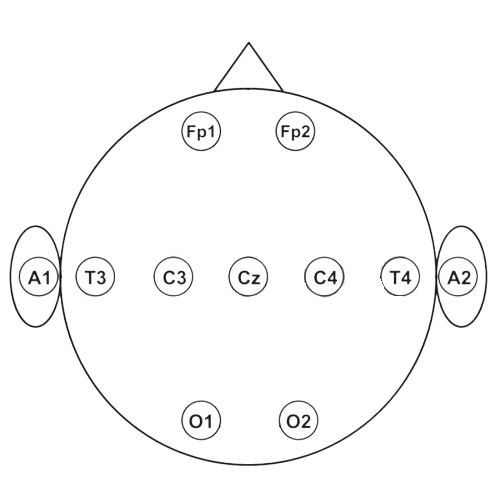

In [3]:
# load the Excel file as a DataFrame
eeg_data = pd.read_excel("datasets/dataset.xlsx")
# convert from Digital Value of Analog Digital converter (ADC) ADS1299 to microvolts

"""
converts raw EEG data from a 24-bit ADC (ranging from 0 to 16777215) into microvolts by normalizing the data,
scaling it to a 4.5V reference voltage, and converting to microvolts,
then rounding to two decimal places. This transformation is necessary for accurately interpreting EEG signals, which are typically measured in microvolts
"""

eeg_data = round(1000000*4.5*(eeg_data/16777216),2) # 2 to the power of 24 = 16777216
display(eeg_data.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,6410.24,791.55,9774.56,10304.67,3329.94,1008.38,8315.22,14155.44
1,6415.23,817.54,9780.35,10284.74,3338.84,999.47,8323.54,14007.41
2,6433.25,844.41,9796.80,10461.31,3358.23,965.94,8342.53,14262.67
3,6441.81,853.83,9803.88,10622.30,3365.77,931.53,8350.57,14621.96
4,6426.65,821.02,9788.67,10529.52,3346.22,952.10,8331.45,14570.11


## Libraries for Visualisation

The simplest libraries for data visualization are Matplotlib and Seaborn. These general-purpose Python libraries are also frequently used for creating custom visualizations of EEG data due to their flexibility and ease of use.   
For the most part, we will use the Matplotlib library, its main advantage over Seaborn is its ability to work in real-time.

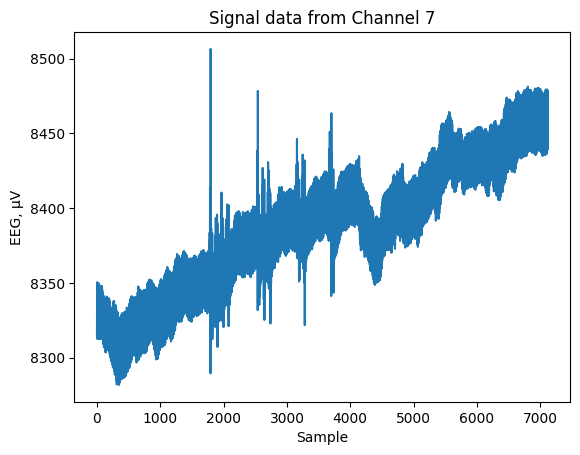

In [4]:
# select the data from the first channel for demo
channel = 6
channel_data = eeg_data.iloc[:, channel]

# plot the EEG data
plt.plot(channel_data)
plt.title("Signal data from Channel 7")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

## Band Pass Filter

Band-pass filtering is a common signal processing technique used in EEG (Electroencephalography) data analysis to isolate specific frequency bands of interest while removing unwanted frequencies. Band-pass filtering allows researchers to focus on particular brainwave rhythms that are relevant to their study. For example, you might want to extract the alpha, beta, or gamma waves from the EEG data.  

You can read more about band-pass filter in [Here](https://github.com/nargesyaghoubi/signal-processing/blob/main/Band-pass-filter.ipynb).


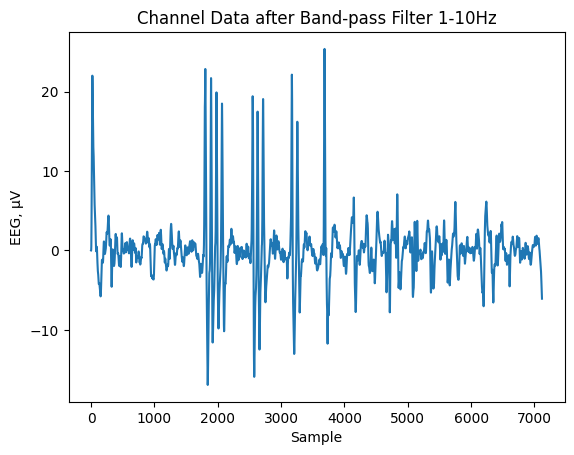

In [5]:
def butter_highpass_filter(data, cutoff, nyq, order=5):
    """Butterworth high-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def butter_lowpass_filter(data, cutoff, nyq, order=5):
    """Butterworth low-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

channel_data_bp_filtered = channel_data.copy()  # copy the data
fps = 250  # sampling frequency
cutoff_high = 1  # cutoff frequency of the high-pass filter
cutoff_low = 10  # cutoff frequency of the low-pass filter
nyq = 0.5 * fps  # Nyquist frequency (half of the sampling frequency)

# apply the band-pass filter
channel_data_bp_filtered = butter_highpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_high,
    nyq=nyq,
    order=5)
channel_data_bp_filtered = butter_lowpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_low,
    nyq=nyq,
    order=4)

plt.plot(channel_data_bp_filtered)
plt.title("Channel Data after Band-pass Filter " + str(cutoff_high)+"-"+ str(cutoff_low)+"Hz")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

In [6]:
# Band Pass Filter filter the whole dataset
# Here we convert EEG data after filtering to Pandas format dataset
eeg_data_filtered = eeg_data.copy()
for channel in range(eeg_data.shape[1]):
    eeg_data_filtered.iloc[:, channel] = butter_highpass_filter(
        data=eeg_data.iloc[:, channel],
        cutoff=cutoff_high,
        nyq=nyq,
        order=5)
    eeg_data_filtered.iloc[:, channel] = butter_lowpass_filter(
        data=eeg_data_filtered.iloc[:, channel],
        cutoff=cutoff_low,
        nyq=nyq,
        order=4)
display(eeg_data_filtered.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,0.001125,0.001760,0.001143,0.010915,0.001315,-0.002345,0.001236,0.017586
1,0.010236,0.019295,0.010539,0.086774,0.012536,-0.021042,0.011767,0.118750
2,0.049322,0.104243,0.050923,0.374177,0.062097,-0.099573,0.058385,0.421968
3,0.168165,0.373581,0.172512,1.213529,0.213303,-0.336886,0.201320,1.200482
4,0.448395,1.004480,0.454931,3.260925,0.565258,-0.906229,0.535972,3.183767
